In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Directorios
base = '/content/drive/MyDrive/Notebooks/ML'
trains = '/content/drive/MyDrive/Notebooks/ML/train'
tests = '/content/drive/MyDrive/Notebooks/ML/test'

train_datagen = ImageDataGenerator(
    # Preprocesar y generar imagenes nuevas
    rescale = 1./255,
    rotation_range = 5,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.3,
    horizontal_flip = True,
    brightness_range = [0.8, 1.5]
)

test_datagen = ImageDataGenerator(1./255) # Escalar valores de 0 a 1

train_gen = train_datagen.flow_from_directory(
    trains,
    target_size = (255, 255),
		color_mode='rgba',
    batch_size = 10,
    class_mode = "binary" # Solo dos clases
)

test_gen = test_datagen.flow_from_directory(
    tests,
    target_size = (255, 255),
		color_mode='rgba',
    batch_size = 10,
    class_mode = "binary" # Solo dos clases
)

Found 3264 images belonging to 2 classes.
Found 799 images belonging to 2 classes.


(10, 255, 255, 4)
[1. 1. 1. 0. 0. 1. 0. 1. 1. 0.]


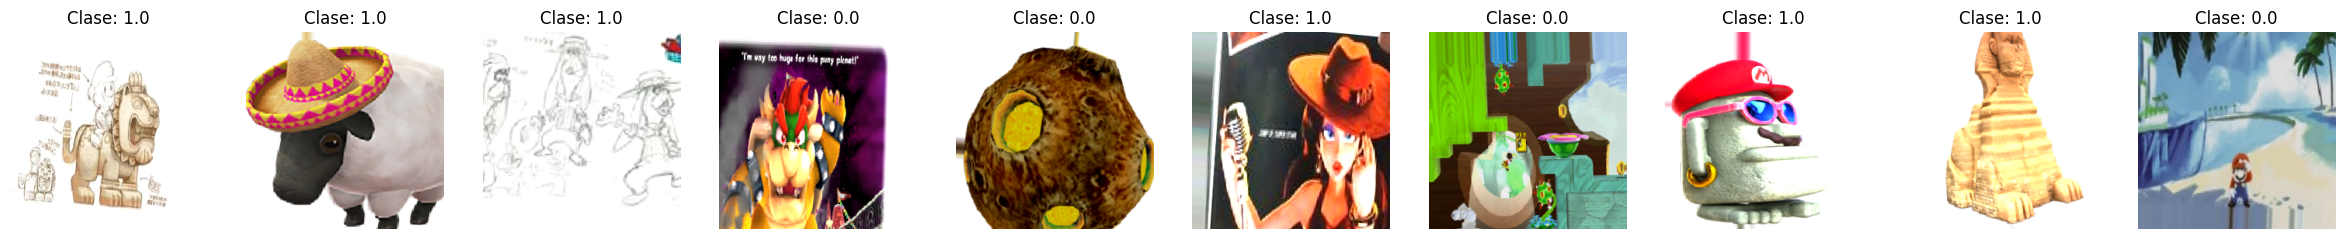

<Figure size 640x480 with 0 Axes>

In [4]:
# Ver batch
images, labels = train_gen[0]
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

print(images.shape)
# Output: Batch size, img width, img height, ???
print(labels)
# Output: Clase en forma de binario

plt.figure()

for i in range(images.shape[0]):
    axarr[i].imshow(images[i])
    axarr[i].set_title(f"Clase: {labels[i]}")
    axarr[i].axis("off")

In [5]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape = (255,255,4),))
# Input shape is size x, size y, and spectrums(rgba)
model.add(layers.Conv2D(20, (3, 3), activation="relu", input_shape = (255,255,4),))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['acc'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 253, 253, 10)   │           370 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 251, 251, 20)   │         1,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 251, 251, 256)  │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 251, 251, 256)  │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16128256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │    16,128,257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,201,615 (61.80 MB)

 Trainable params: 16,201,615 (61.80 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/4
327/327 ━━━━━━━━━━━━━━━━━━━━ 807s 2s/step - acc: 0.5287 - loss: 1.2815
Epoch 2/4
327/327 ━━━━━━━━━━━━━━━━━━━━ 99s 303ms/step - acc: 0.6255 - loss: 0.6690
Epoch 3/4
327/327 ━━━━━━━━━━━━━━━━━━━━ 99s 304ms/step - acc: 0.6838 - loss: 0.5736
Epoch 4/4
327/327 ━━━━━━━━━━━━━━━━━━━━ 100s 307ms/step - acc: 0.6808 - loss: 0.5751


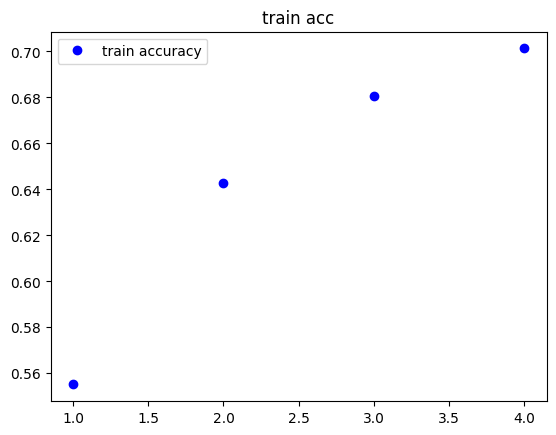

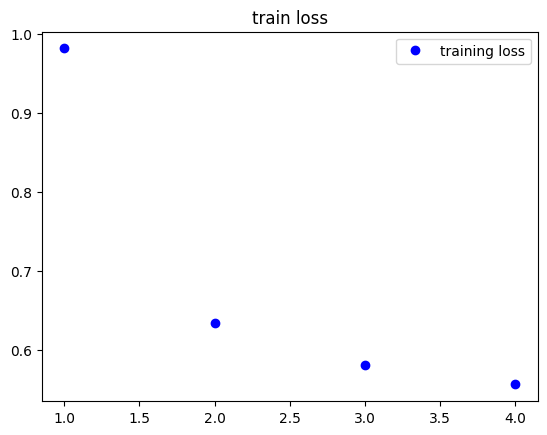

In [7]:
history = model.fit(
						train_gen,
						epochs = 4)

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()
plt.show()

In [8]:
test_datagen = ImageDataGenerator(1./255)
test_gen = test_datagen.flow_from_directory(
					tests,
					target_size = (255, 255),
					color_mode='rgba',
					batch_size = 20,
					class_mode= 'binary')

test_loss, test_acc = model.evaluate(test_gen, steps = 25)
print('\ntest acc :\n', test_acc)


Found 799 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 161s 5s/step - acc: 0.6457 - loss: 119.6239

test acc :
 0.6499999761581421
